In [24]:
import os
import os.path as path
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import load_model

In [25]:
current_dir = os.path.join(os.getcwd())
file = os.path.join(path.dirname(path.dirname(current_dir)), "generate_data\data_gpa.csv")
myData = pd.read_csv(file, delimiter=',', usecols=['gpa','credit','time','difficulty', 'points'])
my_data_copy = myData
myData.shape

(9144, 5)

In [26]:
myData["gpa"] = myData["gpa"].values / 4
myData["credit"] = myData["credit"].values / 6
myData["time"] = myData["time"].values / 6
myData ["difficulty"] = myData['difficulty'].values / 5
myData["points"] = myData["points"].values / 4

In [27]:
df = pd.DataFrame(myData)
df = df.sample(frac=1)

myData = df

In [28]:
targets = myData[['time']].values
myData.drop(('time'), axis=1, inplace=True)
data = myData.values

print(targets.shape)
print(data.shape)

(9144, 1)
(9144, 4)


In [29]:
train_data = data[0 : 4000]
test_data = data[4000: 6000]
val_data = data[6000:8000]

train_targets = targets[0 : 4000]
test_targets = targets[4000: 6000]
val_targets = targets[6000 :8000]

print(len(train_data) + len(test_data) + len(val_data))
print(len(train_targets) + len(test_targets) + len(val_targets))

8000
8000


In [35]:
model = models.Sequential()
model.add(layers.Dense(8, activation="relu", input_shape=(train_data.shape[1],)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
# model.add(layers.Dense(32, activation="relu"))
# model.add(layers.Dense(32, activation="relu"))
# model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
________________________________________________________

In [36]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-4),
    loss="mse",
    metrics=['mae']
    )

In [37]:
history = model.fit(train_data,
                    train_targets,
                    epochs=50,
                    batch_size=100,
                    validation_data=(val_data, val_targets)
                    )

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 0.0823 - mae: 0.2444 - val_loss: 0.0662 - val_mae: 0.2110
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0473 - mae: 0.1709 - val_loss: 0.0339 - val_mae: 0.1384
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0256 - mae: 0.1176 - val_loss: 0.0211 - val_mae: 0.1064
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0184 - mae: 0.1022 - val_loss: 0.0182 - val_mae: 0.1033
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0173 - mae: 0.1015 - val_loss: 0.0175 - val_mae: 0.1022
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0168 - mae: 0.0997 - val_loss: 0.0170 - val_mae: 0.1018
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0163 - mae: 0.0989 - val_loss: 0.0166 - val_mae: 0.0997
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0158 - mae: 0.09

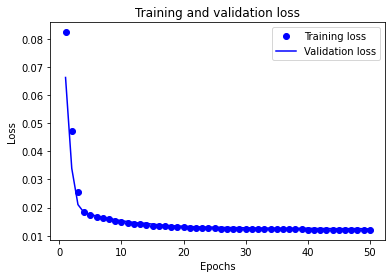

In [38]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

63/63 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0865


In [12]:
predicted = model.predict([[0.8425, 1, 0.8, 0.75]])
predicted   

array([[0.29608813]], dtype=float32)

In [40]:
model.save('time_prediction.h5')